# Probability Analysis
By: Dylan R

2020-08-12

Let's analyze the 3 datasets: 7balls.csv, coinsdata.csv, and dicesdata.csv.

Let's see what patterns we can find. 

The most important concept to know here is Uniform Probability on Finite Spaces:

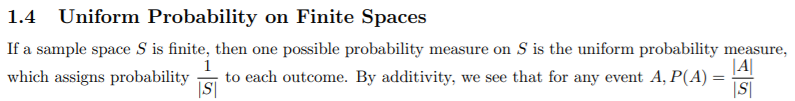

# Loading Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

seven_balls = pd.read_csv("../input/independent-probability-dice-coins/7balls.csv").T
coins_data = pd.read_csv("../input/independent-probability-dice-coins/coinsdata.csv").T
dices_data = pd.read_csv("../input/independent-probability-dice-coins/dicesdata.csv").T
print("Setup ready to go!")

/kaggle/input/independent-probability-dice-coins/7balls.csv
/kaggle/input/independent-probability-dice-coins/dicesdata.csv
/kaggle/input/independent-probability-dice-coins/coinsdata.csv
Setup ready to go!


# 7 balls

In this dataset we have a bag of 7 balls of the colors red, blue, yellow, and black. 

The first column represents the number of balls you have picked from the bag. 

The following columns represent instances of picking the 7 balls, and the resulting colors of the balls picked.

Let's analyze the data and see if we can find any patterns. 

In [2]:
seven_balls

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first,red,black,red,red,black,black,red,black,black,red,...,red,red,blue,red,black,red,yellow,blue,blue,blue
second,black,red,black,black,red,yellow,red,red,blue,blue,...,red,blue,red,blue,red,blue,blue,red,red,red
third,blue,blue,red,blue,blue,blue,blue,yellow,blue,red,...,blue,red,blue,yellow,blue,blue,blue,black,black,red
fourth,red,red,yellow,blue,blue,red,blue,blue,yellow,red,...,yellow,red,black,black,blue,yellow,red,red,red,yellow
fifth,blue,red,blue,yellow,red,blue,red,blue,red,black,...,black,black,yellow,blue,yellow,red,red,blue,yellow,black
sixth,yellow,blue,blue,red,red,red,black,red,red,blue,...,red,blue,red,red,red,red,black,yellow,red,red
seventh,red,yellow,red,red,yellow,red,yellow,red,red,yellow,...,blue,yellow,red,red,red,black,red,red,blue,blue


# Encoding Balls

Encoding balls using [this](https://github.com/curious-attempt-bunny/ml-info/blob/master/How%20to%20handle%20categorical%20data%20in%20scikit%20with%20pandas.ipynb)

**Legend:** 

'red' = 2

'black' = 0

'blue' = 1

'yellow' = 3

For testing purposes we will only encode the first 10 columns.

In [3]:
for i in range(10):
    seven_balls[i] = LabelEncoder().fit_transform(seven_balls[i])
seven_balls

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first,2,0,2,2,0,0,2,0,0,2,...,red,red,blue,red,black,red,yellow,blue,blue,blue
second,0,2,0,0,2,3,2,2,1,1,...,red,blue,red,blue,red,blue,blue,red,red,red
third,1,1,2,1,1,1,1,3,1,2,...,blue,red,blue,yellow,blue,blue,blue,black,black,red
fourth,2,2,3,1,1,2,1,1,3,2,...,yellow,red,black,black,blue,yellow,red,red,red,yellow
fifth,1,2,1,3,2,1,2,1,2,0,...,black,black,yellow,blue,yellow,red,red,blue,yellow,black
sixth,3,1,1,2,2,2,0,2,2,1,...,red,blue,red,red,red,red,black,yellow,red,red
seventh,2,3,2,2,3,2,3,2,2,3,...,blue,yellow,red,red,red,black,red,red,blue,blue


# Analysis

In each round where we pick 7 balls, looking at the data we know that there are 3 red balls, 2 blue balls, 1 yellow ball, and 1 black ball. 

So for the event A where we draw a ball out of the bag for the first time, the probabilities are as follows:

**P(A)** = # of (insert color) balls / # of balls in bag

**P(Red Ball)** = 3/7 = 43%

**P(Blue Ball)** = 2/7 = 29%

**P(Yellow Ball)** = 1/7 = 14%

**P(Black Ball)** = 1/7 = 14%

As you draw more balls out of the bag, the probabilities for each ball will increase, because the # of balls in the bag decrease.

**Legend:** 

'red' = 2

'black' = 0

'blue' = 1

'yellow' = 3

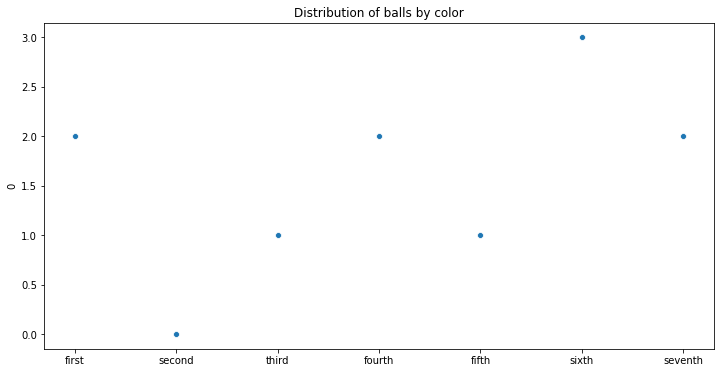

In [4]:
plt.figure(figsize=(12,6))
plt.title("Distribution of balls by color")
plt.ylabel("Ball color (follow legend)")
sns.scatterplot(x=seven_balls.index, y=seven_balls[0])

One instance where we draw 7 balls, we see that the first ball is 2.0 (red), the second ball is 0.0 (black), and so on.

Another instance below shows the first ball is 0.0 (black), the second ball is 2.0 (red), and so on.

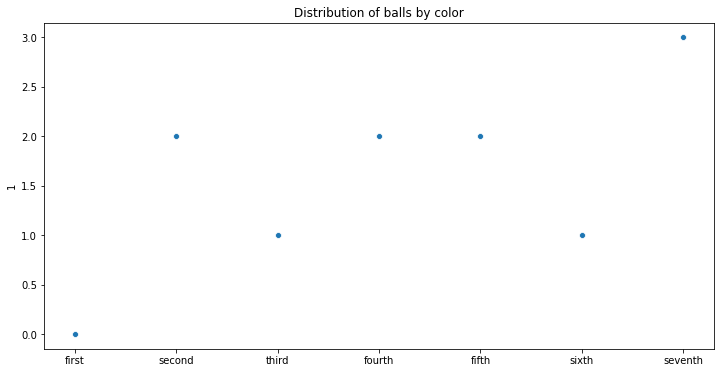

In [5]:
plt.figure(figsize=(12,6))
plt.title("Distribution of balls by color")
plt.ylabel("Ball color (follow legend)")
sns.scatterplot(x=seven_balls.index, y=seven_balls[1])

# 7 balls Conclusion
* We see that there is no visible pattern in the data, other than that every ball must be picked from the bag every time. 

* For example, it is impossible to pick 2 yellow balls out of the bag. 

* We also know that after a ball is picked, the remaining balls each have a much greater chance to be picked. 

* This is because this is [permutation without repetition](https://www.mathsisfun.com/combinatorics/combinations-permutations.html).

# Coins Data

In this dataset, we flip the same coin 5 times. 

The possible outcomes of flipping a coin is either heads or tails. (it doesn't land on its side too often) :(

The following columns represent instances of flipping the coin 4 times, and the resulting outcomes.

Let's analyze the data and see if we can find any patterns.

In [6]:
coins_data

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first_flip,Head,Tail,Head,Head,Tail,Head,Tail,Head,Head,Tail,...,Tail,Tail,Head,Tail,Tail,Tail,Head,Tail,Tail,Tail
second_flip,Tail,Head,Tail,Head,Tail,Head,Head,Tail,Tail,Head,...,Head,Tail,Tail,Head,Head,Head,Tail,Tail,Tail,Head
third_flip,Tail,Head,Head,Head,Head,Head,Tail,Head,Tail,Tail,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Head,Head
fourth_flip,Tail,Tail,Head,Head,Tail,Tail,Tail,Tail,Head,Tail,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Tail,Head
fifth_flip,Head,Tail,Tail,Head,Head,Tail,Tail,Tail,Head,Head,...,Tail,Tail,Tail,Tail,Head,Tail,Head,Head,Tail,Tail


# Encoding Data

Encoding balls using [this](https://github.com/curious-attempt-bunny/ml-info/blob/master/How%20to%20handle%20categorical%20data%20in%20scikit%20with%20pandas.ipynb)

**Legend:** 

'Head' = 0

'Tail' = 1


For testing purposes we will only encode the first 10 columns.

In [7]:
for i in range(10):
    coins_data[i] = LabelEncoder().fit_transform(coins_data[i])
coins_data

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
first_flip,0,1,0,0,1,0,1,0,0,1,...,Tail,Tail,Head,Tail,Tail,Tail,Head,Tail,Tail,Tail
second_flip,1,0,1,0,1,0,0,1,1,0,...,Head,Tail,Tail,Head,Head,Head,Tail,Tail,Tail,Head
third_flip,1,0,0,0,0,0,1,0,1,1,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Head,Head
fourth_flip,1,1,0,0,1,1,1,1,0,1,...,Tail,Head,Tail,Head,Tail,Tail,Tail,Tail,Tail,Head
fifth_flip,0,1,1,0,0,1,1,1,0,0,...,Tail,Tail,Tail,Tail,Head,Tail,Head,Head,Tail,Tail


# Analysis

In each round where we flip the coin 5 times, the possible outcomes are equally likely, Heads or Tails.

So for the event A where we flip a coin, the probabilities are as follows:

P(A) = # of outcomes / # of possible outcomes

P(Head) = 1/2 = 50%

P(Tail) = 1/2 = 50%

As you flip more coins, the probabilities for each outcome will stay the same, because the # of possible outcomes is static.

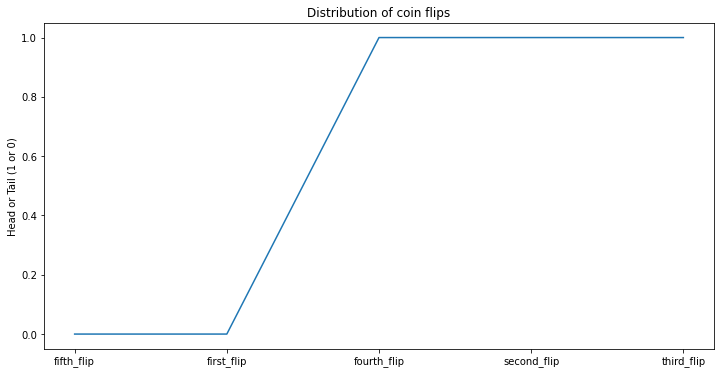

In [8]:
plt.figure(figsize=(12,6))
plt.title("Distribution of coin flips")
plt.ylabel("Head or Tail (1 or 0)")
sns.lineplot(data=coins_data[0])

One instance where we flip 5 coins, we see that the first flip is a Head, the second is a Tail, and so on.

Another instance below shows that the first flip is a Tail, the second is a Head, and so on.

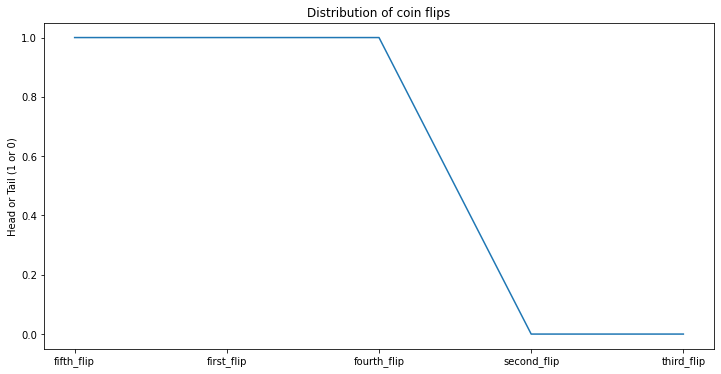

In [9]:
plt.figure(figsize=(12,6))
plt.title("Distribution of coin flips")
plt.ylabel("Head or Tail (1 or 0)")
sns.lineplot(data=coins_data[1])

# Coins Data Conclusion

* We have learned that the outcomes are completely random in this dataset. 

* There is a 50% chance for a Head or Tail, and because we flip the same coin, the probability of each outcome does not change.

* Therefore questions like is 5 Heads more likely than 3 Heads and 2 Tails can be answered because the probability of 5 Heads is 3.125%, while the probability of 3 Heads and 2 Tails is 31.25%. (funny how the numbers work out)

* This is [permutation with repetition](https://brilliant.org/wiki/permutations-with-repetition/)

* This kind of probability can be predictable with probability distributions as I did above, such as the binomial distribution. 

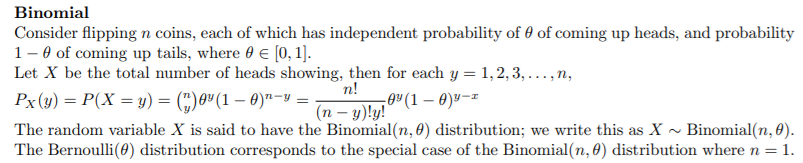

# Dices Data

In this dataset, we roll a die 5 times.

The possible outcomes of rolling a die is {1, 2, 3, 4, 5, 6}.

The following columns represent instances of rolling a die 5 times, and the resulting outcomes.

Let's analyze the data and see if we can find any patterns.

No need to encode this data as it's already composed of numbers :)

In [10]:
dices_data

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
rolling_first_dice,3,3,6,6,1,6,6,3,3,4,...,6,1,6,6,4,1,4,1,1,2
rolling_second_dice,1,3,2,2,1,6,2,1,3,3,...,3,1,1,1,3,4,3,2,3,6
rolling_third_dice,4,1,4,3,4,6,2,2,3,6,...,2,6,6,1,2,3,3,3,1,1
rolling_fourth_dice,1,2,2,6,1,3,6,6,3,6,...,2,2,1,6,1,1,1,4,2,3
rolling_fifth_dice,6,4,1,6,3,1,1,4,2,4,...,1,2,2,1,1,1,3,2,2,3


# Analysis

In each round where we roll the die 5 times, the possible outcomes are equally likely, 1 to 6.

So for the event A where we roll the die, the probabilities are as follows:

P(A) = die outcome / # of possible outcomes

P(1 or 2 or 3 or 4 or 5 or 6) = 1/6 = 16.6%

As you roll the die repeatedly, the probabilities for each outcome will stay the same, because the # of possible outcomes is static.

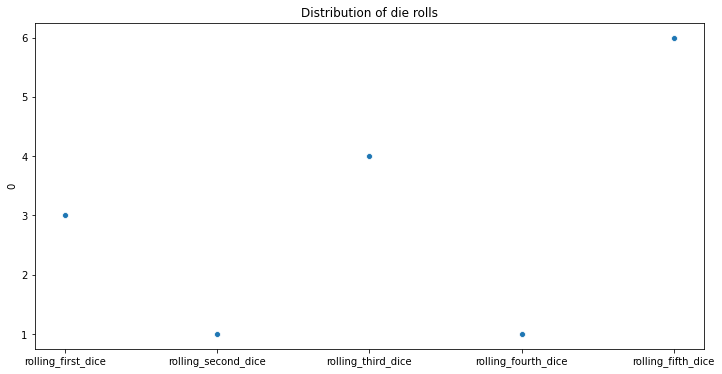

In [11]:
plt.figure(figsize=(12,6))
plt.title("Distribution of die rolls")
plt.ylabel("Die outcome")
sns.scatterplot(x=dices_data.index, y=dices_data[0])

One instance where we roll the die 5 times, we see that the first roll is a 3, the second is a 1, and so on.

Another instance below shows that the first roll is a 3, the second is also a 3, and so on.

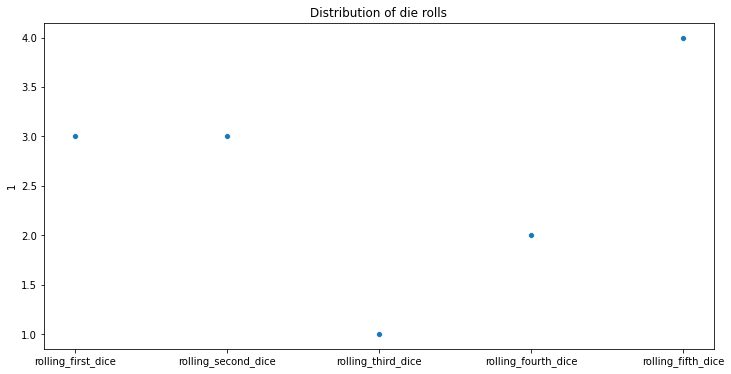

In [12]:
plt.figure(figsize=(12,6))
plt.title("Distribution of die rolls")
plt.ylabel("Die outcome")
sns.scatterplot(x=dices_data.index, y=dices_data[1])

# Dices Data Conclusion

* Like Coins Data, the outcomes in this dataset are entirely random, in that there is always an equal chance of getting a number from 1-6.

* Therefore questions like would the probability the the sum of the die rolls is equal to 6 less likely than a sum of 10 or 20 can be answered. Simply put, the only way the sum can be 6 is if all the die rools are 1, because 1+1+1+1+1+1 = 6. Whereas for 10 or 20, there is more than one way to make the sum of 6 numbers equal to 10 or 20. So the probability is definitely less likely.

* This is [permutation with repetition](https://brilliant.org/wiki/permutations-with-repetition/)

* This kind of probability can be predictable with probability distributions as I did before, such as the binomial distribution. Using the binomial distribution we can calculate that the probability of the 6 die rolls adding up the 6 is about 0.01%. A sum of 10 or 20 is even less!

# In Conclusion

There are many patterns to be found here which make a lot of sense even without a background in probability, such as landing 5 heads after flipping a coin 5 times is very unlikely. I hope someone out there learned something as this is my first notebook! 

Time to study for my probability final!